In [1]:
from captum.attr import NeuronGradient
from receptive_fields.util.experiment_setup import open_experiment
from receptive_fields.util.modules import NamedFromSequential
import torch
from torchinfo import summary
from util.activation_visualization import rescaleZeroOne
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [93]:
model_path = "../models/areadne_grid_factor3/stride_large_ks5"

Files already downloaded and verified


In [100]:
model, train_data= open_experiment(model_path)
seq = model.get_sequential()
seq = torch.nn.Sequential(*[m if not isinstance(m, torch.nn.AvgPool2d) else torch.nn.Identity() for m in seq])
for m in seq:
    if isinstance(m, torch.nn.Conv2d):
        m.stride = (1,1)
        m.padding = (0,0)

In [ ]:
seq_model = NamedFromSequential(seq[:-9])

In [ ]:
seq_model

NamedFromSequential(
  (Conv2d_0): Conv2d(3, 32, kernel_size=(5, 5), stride=(3, 3), padding=(2, 2))
  (ELU_0): ELU(alpha=1.0, inplace=True)
  (Conv2d_1): Conv2d(32, 32, kernel_size=(5, 5), stride=(3, 3), padding=(2, 2))
  (ELU_1): ELU(alpha=1.0, inplace=True)
  (Conv2d_2): Conv2d(32, 32, kernel_size=(5, 5), stride=(3, 3), padding=(2, 2))
  (ELU_2): ELU(alpha=1.0, inplace=True)
  (Conv2d_3): Conv2d(32, 32, kernel_size=(5, 5), stride=(3, 3), padding=(2, 2))
  (ELU_3): ELU(alpha=1.0, inplace=True)
)

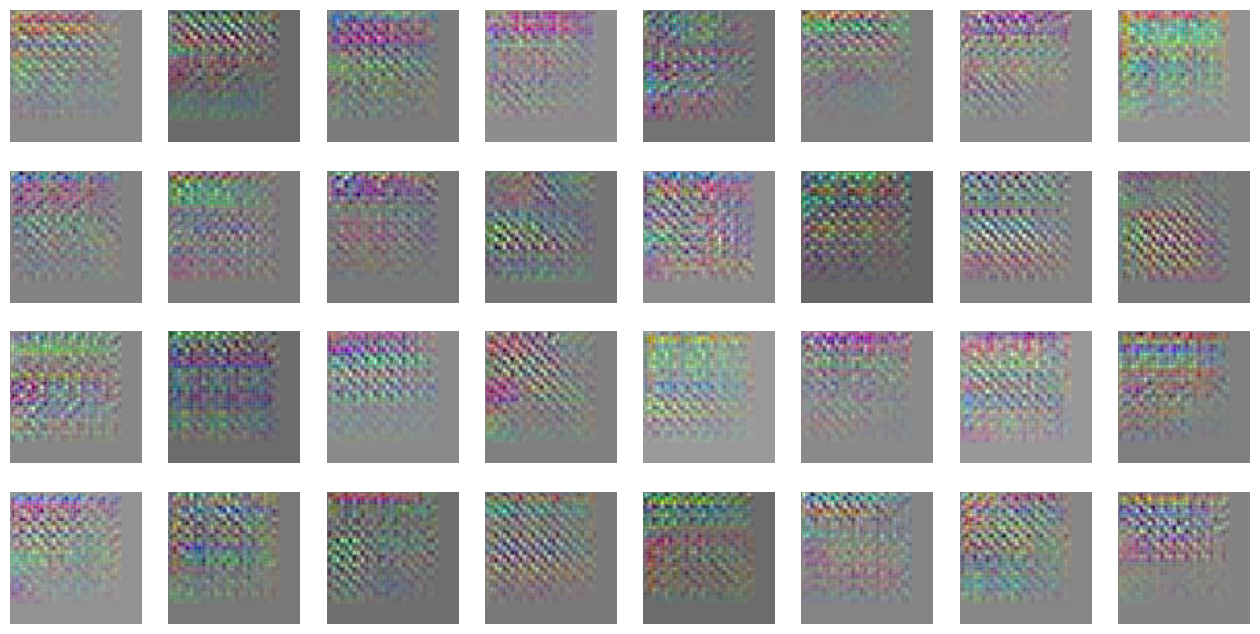

In [ ]:
grad = NeuronGradient(seq_model, seq_model.ELU_3)
fig, axes = plt.subplots(4,8, figsize=(16,8))
for i, ax in enumerate(axes.flat):
    rf = grad.attribute(torch.zeros(1,3,*model.img_size[::-1], requires_grad=True), neuron_selector=(i,0,0))
    ax.imshow(rescaleZeroOne(rf[0].movedim(0,2).detach().cpu())[:96,:96])
    ax.axis('off')